In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import pi
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def haldane_z(N,m,t1,t2,phi,Np):
    p=np.linspace(-pi/2,pi/2,Np+1)
    d1=m+2*t2*np.sin(phi)*np.sin(2*p)
    d2=-2*t1*np.cos(p)
    d3=-t1+p*0
    d4=2*t2*np.cos(p+phi)
    d5=2*t2*np.cos(p-phi)
    d6=2*t2*np.cos(phi)*np.cos(2*p)
    a=np.zeros((Np+1,2*N,2*N))
    for i in range(N):
        a[:,i,i]=d1[:]+d6[:]
        a[:,i+N,i+N]=-d1[:]+d6[:]
        a[:,i+N,i]=d2[:]
        a[:,i,i+N]=d2[:]
    for i in range(N-1):
        a[:,i+1,i]=d4[:]
        a[:,i,i+1]=d4[:]
        a[:,i+N+1,i+N]=d5[:]
        a[:,i+N,i+N+1]=d5[:]
        a[:,i+1,i+N]=d3[:]
        a[:,i+N,i+1]=d3[:]
    b=np.linalg.eigvals(a)
    return b

def haldane_a(N,m,t1,t2,phi,Np):
     p=np.linspace(-pi/6,pi/6,Np+1)
     d1=m
     d2=-t1*np.exp(0.+p*2j)
     d3=-t1*np.exp(0.-p*2j)
     d4=t2*np.exp(0.-phi*1j)
     d5=t2*np.exp(0.+phi*1j)
     d6=2*t2*np.cos(3*p)*np.exp(0.+phi*1j)
     d7=2*t2*np.cos(3*p)*np.exp(0.-phi*1j)
     d8=-t1*np.exp(0.+p*1j)
     d9=-t1*np.exp(0.-p*1j)
     a=np.zeros((Np+1,2*N,2*N), dtype=complex)
     for i in range(N):
        a[:,i,i]=d1
        a[:,i+N,i+N]=-d1
        a[:,i,i+N]=d2[:]
        a[:,i+N,i]=d3[:]
     for i in range(N-1):
        a[:,i,i+1]=d6[:]
        a[:,i+1,i]=d7[:]
        a[:,N+i,i+1+N]=d7[:]
        a[:,i+1+N,N+i]=d6[:]
        a[:,i+1,i+N]=d9[:]
        a[:,i,i+N+1]=d9[:]
        a[:,i+N,i+1]=d8[:]
        a[:,i+N+1,i]=d8[:]
     for i in range(N-2):
        a[:,i,i+2]=d4
        a[:,i+2,i]=d5
        a[:,i+N,i+2+N]=d5
        a[:,i+N+2,i+N]=d4
     b,c=np.linalg.eig(a)
     return b

def E_hald(m,t2,phi,N):
    k1=np.linspace(-pi/2,pi/2,N+1)
    k2=np.linspace(-pi,pi,N+1)
    E=np.zeros((N+1,2*N+2))
    for i in range(N+1):
       E[:,i]=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2[i])*np.cos(k1))+np.sqrt(1+4*np.cos(k1)*np.cos(k2[i])+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[i])*np.sin(k1))))
       E[:,i+N+1]=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2[i])*np.cos(k1))-np.sqrt(1+4*np.cos(k1)*np.cos(k2[i])+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[i])*np.sin(k1))))
    E=np.reshape(E,2*(N+1)**2)
    return E    
    
def E_Z(m,t2,phi,N):
    c=np.linspace(-1,1,101)
    k1=np.linspace(-pi,pi,N+1)
    k2=np.linspace(-pi,pi,N+1)
    E=np.zeros((N+1,N+1))
    for i in range(N+1):
       E[:,i]=(m+2*t2*np.sin(phi)*(np.sin(np.sqrt(3)*k1)-2*np.cos(3*k2[i]/2)*np.sin(np.sqrt(3)*k1/2)))/(np.sqrt(1+4*np.cos(np.sqrt(3)*k1/2)*np.cos(3*k2[i]/2)+4*np.square(np.cos(np.sqrt(3)*k1/2))+np.square(m+2*t2*np.sin(phi)*(np.sin(np.sqrt(3)*k1)-2*np.cos(3*k2[i]/2)*np.sin(np.sqrt(3)*k1/2)))))
    plt.figure()    
    cp = plt.contourf(k2, k1, E, c )
    plt.colorbar(cp)
    plt.xlabel('kx ')
    plt.ylabel('ky')
    plt.show() 
   
def g(d,ei,ef):
    N=d.shape[0]-1
    h=(ef-ei)/N
    return ig(d,N+1,h)
    
def ig(d,N,h):
    if N == 1:
        return 0
    elif N==0:
        return 0
    elif N == 2:
        return (d[0]+d[1])*h/2
    elif N == 3:
        return (d[0]+4*d[1]+d[2])*h/3
    elif N == 4:
        return (d[0]+3*d[1]+3*d[2]+d[3])*3*h/8
    elif (N+1)%2 == 0:
        return ((d[N-1]+d[0]+sum(d[1::2])*4+sum(d[2:N-1:2])*2))*h/3
    elif (N+1)%2 == 1:
        return (sum(d[1:N-3:2])*4+sum(d[2:N-5:2])*2+d[0]+d[N-4])*h/3+ig(d[-4:],4,h)
    #elif (N+1)%2 == 0:
        #return sum(ig(d[i:i+3],3,h) for i in range(0,N-1,2))
    #elif (N+1)%2 == 1:
        #return sum(ig(d[i:i+3],3,h) for i in range(0,N-3,2))+ig(d[-4:],4,h)
    #else:
        #return

def Dos2(f,ei,ef,Nw,N):
    E=((f-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,minlength=Nw-1)*(Nw-1)*(2*pi/N)*(pi/N)/((ef-ei)*12*pi)
    t=g(D,ei,ef)
    D1=D/t
    return D1
     
def D22(f,ei,ef,Nw,N):
    E=((f-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,minlength=Nw-1)*(Nw-1)*(2*pi/N)*(pi/N)/((ef-ei)*12*pi)
    return D
    
def D11(f,ei,ef,Nw,N,m):
    E=((f-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,minlength=Nw-1)*(Nw-1)*(pi/N)/((ef-ei)*m*2*pi)   
    return D    
    
def Dos1(f,ei,ef,Nw,N):
    E=((f-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,minlength=Nw-1)*(Nw-1)*(pi/N)/(ef-ei)   
    t=g(D,ei,ef)
    D1=D/t
    return D1

def D33(f,ei,ef,Nw,N,m):
    E=((f-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,minlength=Nw-1)*(Nw-1)*(pi/(3*N))/((ef-ei)*m*2)   
    return D
    
def Dos3(f,ei,ef,Nw,N):
    E=((f-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,minlength=Nw-1)*(Nw-1)*(pi/(3*N))/(ef-ei)   
    t=g(D,ei,ef)
    D1=D/t
    return D1
    
def u(d,tf,w,N,v):
    h=tf/N
    a=np.linspace(0,tf,2*N+1)
    return u_cal(d,a,w,N,h,tf,v)*np.exp(0+w*a*1j)
    
def u_cal(d,a,w,N,h,tf,v):
    U=np.zeros((2*N+1), dtype=complex)
    g=G(0,tf,N,w,d,v)
    U[0]=1
    k1=0
    k2=-h*(g[1]*U[0]+g[0]*(U[0]+h*k1/2))/4
    k3=-h*(g[1]*U[0]+g[0]*(U[0]+h*k2/2))/4
    U[1]=U[0]+(k1+k2)*h/4
    k4=-h*(g[2]*U[0]+4*g[1]*U[1]+g[0]*(U[0]+h*k3))/6
    U[2]=U[0]+(k1+2*k2+2*k3+k4)*h/6
    for i in range(1,N):
          a1=g[:2*i+1][::-1]*U[:2*i+1]
          a2=g[3:2*i+2][::-1]*U[:2*i-1]
          a3=g[2:2*i+3][::-1]*U[:2*i+1]          
          k1=-ig(a1,2*i+1,h/2)
          k2=-3*h*(g[3]*U[2*i-2]+3*g[2]*U[2*i-1]+3*g[1]*U[2*i]+g[0]*(U[2*i]+k1*h/2))/16-ig(a2,2*i-1,h/2)
          k3=-3*h*(g[3]*U[2*i-2]+3*g[2]*U[2*i-1]+3*g[1]*U[2*i]+g[0]*(U[2*i]+k2*h/2))/16-ig(a2,2*i-1,h/2)
          U[2*i+1]=U[2*i]+(k1+k2)*h/4
          k4=-h*(g[2]*U[2*i]+4*g[1]*U[2*i+1]+g[0]*(U[2*i]+h*k3))/6-ig(a3,2*i+1,h/2)
          U[2*i+2]=U[2*i]+h*(k1+2*k2+2*k3+k4)/6
    return U
     
def G(ti,tf,N,ed,d,v):
    a=np.linspace(ti,tf,2*N+1)
    b=s(-a+ti,d,v)*np.exp(0-ed*(a-ti)*1j)
    return b
    
def s(a,d,v):
    Nw=d.shape[0]-1
    h=(8)/Nw
    w=np.linspace(-4,4,Nw+1)
    b=np.zeros(a.shape[0], dtype=complex)
    for i in range(a.shape[0]):
      r=v*d*np.exp(0-a[i]*w*1j)
      b[i]=ig(r,Nw,h)
    return b

def J2(ei,ef,m,t2,phi,Nw,N,h):
    k1=np.linspace(-pi,pi,N+1)
    k2=np.linspace(-pi/2,pi/2,N+1)
    E=np.zeros((N+1,2*N+2))
    U=np.zeros((N+1,N+1))
    V=np.zeros((N+1,2*N+2))
    for j in range(N+1):
        E[:,j]=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2[j])*np.cos(k1))+np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[j])*np.sin(k1))))
        E[:,j+N+1]=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2[j])*np.cos(k1))-np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[j])*np.sin(k1))))
        U[:,j]=np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1))))
    if h==0: 
     for i in range(N+1):
        V[:,i]=(1+4*np.cos(k1)*np.cos(k2[i])+4*np.square(np.cos(k1)))/(2*(U[:,i])*(U[:,i]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[i])*np.sin(k1))))
        V[:,i+N+1]=(U[:,i]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[i])*np.sin(k1)))/(2*U[:,i])
    elif h==1:
      for k in range(N+1):
        V[:,k]=(U[:,k]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[k])*np.sin(k1)))/(2*U[:,k])
        V[:,k+N+1]=(1+4*np.cos(k1)*np.cos(k2[k])+4*np.square(np.cos(k1)))/(2*(U[:,k])*(U[:,k]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[k])*np.sin(k1))))        
    a=np.reshape(E,2*(N+1)**2)
    b=np.reshape(V,2*(N+1)**2)
    E=((a-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,weights=b,minlength=Nw-1)*(Nw-1)*(2*pi/N)*(pi/N)/((ef-ei)*12*pi)
    x=D22(a,ei,ef,Nw,N)
    t=g(x,ei,ef)
    D1=D/t
    return D1     
        
def J1(ei,ef,N,m,t1,t2,phi,Nw,Np,e): 
    p=np.linspace(-pi/2,pi/2,Np+1)
    d1=m+2*t2*np.sin(phi)*np.sin(2*p)
    d2=-2*t1*np.cos(p)
    d3=-t1+p*0
    d4=2*t2*np.cos(p+phi)
    d5=2*t2*np.cos(p-phi)
    d6=2*t2*np.cos(phi)*np.cos(2*p)
    a=np.zeros((Np+1,2*N,2*N))
    for i in range(N):
        a[:,i,i]=d1[:]+d6[:]
        a[:,i+N,i+N]=-d1[:]+d6[:]
        a[:,i+N,i]=d2[:]
        a[:,i,i+N]=d2[:]
    for i in range(N-1):
        a[:,i+1,i]=d4[:]
        a[:,i,i+1]=d4[:]
        a[:,i+N+1,i+N]=d5[:]
        a[:,i+N,i+N+1]=d5[:]
        a[:,i+1,i+N]=d3[:]
        a[:,i+N,i+1]=d3[:]
    b,c=np.linalg.eig(a)
    d=np.linalg.inv(c)
    #ind=np.argsort(b, axis=-1)
    #ind0 = np.arange(Np+1)[:,None]
    #d=d[ind0,ind,:]       
    M=np.square(d)
    t=M[:,:,e]
    #t=M[:,e,:]
    b=np.reshape(b,2*N*Np+2*N).real
    t=np.reshape(t,2*N*Np+2*N).real
    E=((b-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,weights=t,minlength=Nw-1)*(Nw-1)*(pi/Np)/((ef-ei)*N*2*pi)
    x=D11(b,ei,ef,Nw,Np,N)
    t=g(x,ei,ef)
    D1=D/t
    return D1    
    
def J3(ei,ef,N,m,t1,t2,phi,Nw,Np,e):
    p=np.linspace(-pi/6,pi/6,Np+1)
    d1=m
    d2=-t1*np.exp(0.+p*2j)
    d3=-t1*np.exp(0.-p*2j)
    d4=t2*np.exp(0.-phi*1j)
    d5=t2*np.exp(0.+phi*1j)
    d6=2*t2*np.cos(3*p)*np.exp(0.+phi*1j)
    d7=2*t2*np.cos(3*p)*np.exp(0.-phi*1j)
    d8=-t1*np.exp(0.+p*1j)
    d9=-t1*np.exp(0.-p*1j)
    a=np.zeros((Np+1,2*N,2*N), dtype=complex)
    for i in range(N):
        a[:,i,i]=d1
        a[:,i+N,i+N]=-d1
        a[:,i,i+N]=d2[:]
        a[:,i+N,i]=d3[:]
    for i in range(N-1):
        a[:,i,i+1]=d6[:]
        a[:,i+1,i]=d7[:]
        a[:,N+i,i+1+N]=d7[:]
        a[:,i+1+N,N+i]=d6[:]
        a[:,i+1,i+N]=d9[:]
        a[:,i,i+N+1]=d9[:]
        a[:,i+N,i+1]=d8[:]
        a[:,i+N+1,i]=d8[:]
    for i in range(N-2):
        a[:,i,i+2]=d4
        a[:,i+2,i]=d5
        a[:,i+N,i+2+N]=d5
        a[:,i+N+2,i+N]=d4
    b,c=np.linalg.eig(a)
    d=np.abs(np.linalg.inv(c))       
    M=d*np.conjugate(d)
    t=M[:,:,e]
    b=np.reshape(b,2*N*Np+2*N).real
    t=np.reshape(t,2*N*Np+2*N)
    E=((b-ei)/(ef-ei)*Nw).astype(int)
    E[E<0]=0
    E[E>Nw-1]=Nw-1
    D=np.bincount(E,weights=t,minlength=Nw-1)*(Nw-1)*(pi/(3*Np))/((ef-ei)*N*2)
    x=D33(b,ei,ef,Nw,Np,N)
    t=g(x,ei,ef)
    D1=D/t
    return D1 
    
def t(p,a):
    plt.plot(*sum([(p,e) for e in a.T], ()))

def gb(m,t2,phi,N):
    k2=np.linspace(0,pi,N+1)
    k1=np.linspace(0,pi/3,N+1)
    f=k1[::-1]
    b=k2[::-1]
    j=np.linspace(0,1,4*N+4)
    E=np.zeros((2,4*N+4))
    for i in range(N+1):
        E[0,i]=2*t2*np.cos(phi)*(np.cos(2*k1[i])+2*np.cos(k2[i])*np.cos(k1[i]))+np.sqrt(1+4*np.cos(k1[i])*np.cos(k2[i])+4*np.square(np.cos(k1[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1[i])-2*np.cos(k2[i])*np.sin(k1[i]))))
        E[1,i]=2*t2*np.cos(phi)*(np.cos(2*k1[i])+2*np.cos(k2[i])*np.cos(k1[i]))-np.sqrt(1+4*np.cos(k1[i])*np.cos(k2[i])+4*np.square(np.cos(k1[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1[i])-2*np.cos(k2[i])*np.sin(k1[i]))))
        E[0,i+N+1]=2*t2*np.cos(phi)*(np.cos(2*f[i])+2*np.cos(k2[N])*np.cos(f[i]))+np.sqrt(1+4*np.cos(f[i])*np.cos(k2[N])+4*np.square(np.cos(f[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*f[i])-2*np.cos(k2[N])*np.sin(f[i]))))
        E[1,i+N+1]=2*t2*np.cos(phi)*(np.cos(2*f[i])+2*np.cos(k2[N])*np.cos(f[i]))-np.sqrt(1+4*np.cos(f[i])*np.cos(k2[N])+4*np.square(np.cos(f[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*f[i])-2*np.cos(k2[N])*np.sin(f[i]))))
        E[0,i+2*N+2]=2*t2*np.cos(phi)*(np.cos(-2*k1[i])+2*np.cos(k2[N])*np.cos(-k1[i]))+np.sqrt(1+4*np.cos(-k1[i])*np.cos(k2[N])+4*np.square(np.cos(-k1[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(-2*k1[i])-2*np.cos(k2[N])*np.sin(-k1[i]))))
        E[1,i+2*N+2]=2*t2*np.cos(phi)*(np.cos(-2*k1[i])+2*np.cos(k2[N])*np.cos(-k1[i]))-np.sqrt(1+4*np.cos(-k1[i])*np.cos(k2[N])+4*np.square(np.cos(-k1[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(-2*k1[i])-2*np.cos(k2[N])*np.sin(-k1[i]))))
        E[0,i+3*N+3]=2*t2*np.cos(phi)*(np.cos(-2*f[i])+2*np.cos(b[i])*np.cos(-f[i]))+np.sqrt(1+4*np.cos(-f[i])*np.cos(b[i])+4*np.square(np.cos(-f[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(-2*f[i])-2*np.cos(b[i])*np.sin(-f[i]))))
        E[1,i+3*N+3]=2*t2*np.cos(phi)*(np.cos(-2*f[i])+2*np.cos(b[i])*np.cos(-f[i]))-np.sqrt(1+4*np.cos(-f[i])*np.cos(b[i])+4*np.square(np.cos(-f[i]))+np.square(m+2*t2*np.sin(phi)*(np.sin(-2*f[i])-2*np.cos(b[i])*np.sin(-f[i]))))
    plt.plot(j,E[0,:])
    plt.plot(j,E[1,:])
    return
    
def BC(m,t2,phi,N):
    k1=np.linspace(-pi/2,pi/2,N+1)
    k2=np.linspace(-pi,pi,N+1)
    h1=pi/N
    h2=2*pi/N
    a=np.zeros((N+1,N+1))
    b=np.zeros((N+1,N+1))
    c=np.zeros((N+1,N+1))
    d=np.zeros((N+1,N+1))
    e=np.zeros((N+1,N+1))
    j=np.zeros(N+1)
    for i in range(N+1):
        a[:,i]=-8*t2*np.cos(k1[:])*np.square(np.cos(k2[i]))*np.sin(k1[:])*np.sin(phi)
        b[:,i]=-t2*(6+16*np.cos(2*k1[:])+2*np.cos(4*k1[:])+np.sin(2*(k1[:]-k2[i]))+np.sin(2*(k1[:]+k2[i])))*np.sin(phi)
        c[:,i]=-2*np.sin(2*k2[i])*(m-t2*np.sin(phi))
        d[:,i]=-4*np.cos(k2[i])*(t2*np.cos(k1[:])*(5+np.cos(2*k1[:]))*np.sin(phi)-6*t2*np.cos(k1[:])*np.square(np.sin(k1[:]))*np.sin(phi)+np.sin(k1[:])*(m+2*t2*np.sin(phi)))
        e[:,i]=(1+4*np.cos(k1[:])*np.cos(k2[i])+4*np.square(np.cos(k1[:]))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[i])*np.sin(k1))))**(3/2)
        f=(a[:,i]+b[:,i]+c[:,i]+d[:,i])/e[:,i]
        j[i]=ig(f,N,h1)
    k=ig(j,N,h2)/(2*pi*pi)
    return k
    
def uc1(N,t2,Ns,tf,f,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-pi/2,pi/2,Ns+1)
    Z1=np.zeros((2*N+1,Ns+1))
    Z2=np.zeros((2*N+1,Ns+1),dtype=complex)
    Z3=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        s=-pi/2+i*pi/Ns
        J=J1(-4,4,50,0.5,1,t2,s,2502,5000,e)
        a=u(J,tf,-3*t2*np.cos(s),N,f)
        b=v(a,J,tf,0.01,-3*t2*np.cos(s),f)
        Z1[:,i]=np.abs(a)
        Z2[:,i]=b
        Z3[:,i]=b+np.abs(a)**2
    Z1=np.transpose(Z1)
    Z2=np.transpose(Z2)
    Z3=np.transpose(Z3)
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)
    plt.figure()    
    cp = plt.contourf(X, Y, Z1,p1,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z2,p2,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z3,p3,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()
    
def uc2(N,t2,Ns,tf,y,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-pi/2,pi/2,Ns+1)
    Z1=np.zeros((2*N+1,Ns+1))
    Z2=np.zeros((2*N+1,Ns+1))
    Z3=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        s=-pi/2+i*pi/Ns
        J=J2(-4,4,0.5,t2,s,2502,5000,e)
        a=u(J,tf,-3*t2*np.cos(s),N,y)
        b=v(a,J,tf,0.01,-3*t2*np.cos(s),y)
        Z1[:,i]=np.abs(a)
        Z2[:,i]=b
        Z3[:,i]=b+np.abs(a)**2
    Z1=np.transpose(Z1)
    Z2=np.transpose(Z2)
    Z3=np.transpose(Z3)
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)
    plt.figure()    
    cp = plt.contourf(X, Y, Z1,p1,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure() 
    cp = plt.contourf(X, Y, Z2,p2,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()    
    cp = plt.contourf(X, Y, Z3,p3,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()  
    
def uc3(N,t2,Ns,tf,f,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-pi/2,pi/2,Ns+1)
    Z1=np.zeros((2*N+1,Ns+1))
    Z2=np.zeros((2*N+1,Ns+1),dtype=complex)
    Z3=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        s=-pi/2+i*pi/Ns
        J=J3(-4,4,50,-0.5,1,t2,s,2502,5000,e)
        a=u(J,tf,-3*t2*np.cos(s),N,f)
        b=v(a,J,tf,0.01,-3*t2*np.cos(s),f)
        Z1[:,i]=np.abs(a)
        Z2[:,i]=b
        Z3[:,i]=b+np.abs(a)**2
    Z1=np.transpose(Z1)
    Z2=np.transpose(Z2)
    Z3=np.transpose(Z3)
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)
    plt.figure()    
    cp = plt.contourf(X, Y, Z1,p1,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z2,p2,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z3,p3,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()   
    
def ucm1(N,t2,Ns,tf,f,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-1,1,Ns+1)
    X1=np.ones(2*N+1)*np.sqrt(6)/4
    Y1=-1*np.ones(2*N+1)*np.sqrt(6)/4
    Z1=np.zeros((2*N+1,Ns+1))
    Z2=np.zeros((2*N+1,Ns+1),dtype=complex)
    Z3=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        t=-1+i*2/Ns
        J=J1(-4,4,50,t,1,t2,pi/4,4002,7000,e)
        a=u(J,tf,-3*t2*np.cos(pi/4)+0.1,N,f)
        b=v(a,J,tf,0,-3*t2*np.cos(pi/4),f)
        Z1[:,i]=np.abs(a)
        Z2[:,i]=b
        Z3[:,i]=b+np.abs(a)**2
    Z1=np.transpose(Z1)
    Z2=np.transpose(Z2)
    Z3=np.transpose(Z3)
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)
    plt.figure()    
    cp = plt.contourf(X, Y, Z1,p1)
    cber=plt.colorbar(cp)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z2,p2)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z3,p3)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()

def ucm2(N,t2,Ns,tf,f,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-1,1,Ns+1)
    X1=np.ones(2*N+1)*np.sqrt(6)/4
    Y1=-1*np.ones(2*N+1)*np.sqrt(6)/4
    Z1=np.zeros((2*N+1,Ns+1))
    Z2=np.zeros((2*N+1,Ns+1),dtype=complex)
    Z3=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        t=-1+i*2/Ns
        J=J2(-4,4,t,t2,pi/4,2502,5000,e)
        a=u(J,tf,-3*t2*np.cos(pi/4),N,f)
        b=v(a,J,tf,0,-3*t2*np.cos(pi/4),f)
        Z1[:,i]=np.abs(a)
        Z2[:,i]=b
        Z3[:,i]=b+np.abs(a)**2
    Z1=np.transpose(Z1)
    Z2=np.transpose(Z2)
    Z3=np.transpose(Z3)
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)
    plt.figure()    
    cp = plt.contourf(X, Y, Z1,p1,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z2,p2,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z3,p3,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()    
    
def ucm3(N,t2,Ns,tf,f,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-1,1,Ns+1)
    X1=np.ones(2*N+1)*np.sqrt(6)/4
    Y1=-1*np.ones(2*N+1)*np.sqrt(6)/4
    Z1=np.zeros((2*N+1,Ns+1))
    Z2=np.zeros((2*N+1,Ns+1),dtype=complex)
    Z3=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        t=-1+i*2/Ns
        J=J3(-4,4,50,t,1,t2,pi/4,2502,5000,e)
        a=u(J,tf,-3*t2*np.cos(pi/4),N,f)
        b=v(a,J,tf,0,-3*t2*np.cos(pi/4),f)
        Z1[:,i]=np.abs(a)
        Z2[:,i]=b
        Z3[:,i]=b+np.abs(a)**2
    Z1=np.transpose(Z1)
    Z2=np.transpose(Z2)
    Z3=np.transpose(Z3)
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)
    plt.figure()    
    cp = plt.contourf(X, Y, Z1,p1,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z2,p2,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp = plt.contourf(X, Y, Z3,p3,cmap=plt.cm.hot)
    cber=plt.colorbar(cp)
    cber.set_label(r"u", size=25)
    plt.plot(X,X1,"b",linewidth=1.2)
    plt.plot(X,Y1,"b",linewidth=1.2)
    plt.xlabel(' $\epsilon \tua$',fontsize=25)
    plt.ylabel('$\phi$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()
   
def v(u,d,tf,T,e,f):
    N=u.shape[0]-1
    Nd=d.shape[0]-1
    hd=8/Nd
    w=np.linspace(-4,4,Nd+1)
    t=np.linspace(0,tf,N+1)
    y=np.zeros(Nd+1)
    h=tf/N
    v1=np.zeros(N+1)
    if T > 0:
      for i in range(N+1):
        if i == 0:
           r=0 
           s=0
           q=s
        elif i%2 == 1:
           r=u[i-1:i+1]
           a=t[i-1:i+1]
           s=igg(r,a,2,h,w)+q
        elif i%2 == 0:
           r=u[i-2:i+1]
           a=t[i-2:i+1]
           s=igg(r,a,3,h,w)+q
           q=s
        y=f*d*s*np.conjugate(s)/(1+np.exp((w-e)/T))
        v1[i]=ig(y,Nd+1,hd)
    if T == 0:
        v1=v0(u,d,tf,e,f)
    return v1 

def v0(u,d,tf,e,f):
    N=u.shape[0]-1
    Nd=d.shape[0]-1
    hd=8/Nd
    w=np.linspace(-4,4,Nd+1)
    t=np.linspace(0,tf,N+1)
    y=np.zeros(Nd+1)
    h=tf/N
    v1=np.zeros(N+1)
    yy=np.linspace(-4+e,4+e,Nd+1)
    xx=0.5*(np.sign(yy)+1)
    for i in range(N+1):
        if i == 0:
           r=0 
           s=0
           q=s
        elif i%2 == 1:
           r=u[i-1:i+1]
           a=t[i-1:i+1]
           s=igg(r,a,2,h,w)+q
        elif i%2 == 0:
           r=u[i-2:i+1]
           a=t[i-2:i+1]
           s=igg(r,a,3,h,w)+q
           q=s
        y=f*s*np.conjugate(s)*d*xx[::-1]
        v1[i]=ig(y,Nd+1,hd)   
    return v1
    
def igg(r,t,N,h,w):
    #f1=np.zeros(w.shape[0],dtype=complex)
    n1=w.shape[0]
    n2=r.shape[0]
    w1=np.tile(w,(n2,1))
    r1=np.tile(r,(n1,1))
    t1=np.tile(t,(n1,1))
    w1=np.transpose(w1)
    s=r1*np.exp(-w1*t1*1j)
    if n2 == 2:
       return h*np.sum(s,axis=1,dtype=complex)/2
    if n2 == 3:
       s[:,1]=s[:,1]*4
       return h*np.sum(s,axis=1,dtype=complex)/3
    #for i in range (w.shape[0]):
        #e=r*np.exp(-w[i]*t*1j)
        #f1[i]=ig(e,N,h)
    #return f1
        
def delta2(ei,ef,m,t2,phi,Nw,N,h):
    k1=np.linspace(-pi,pi,N+1)
    k2=np.linspace(-pi/2,pi/2,N+1)
    w=np.linspace(ei,ef,Nw+1)
    k1, k2=np.meshgrid(k1, k2)
    #E1=np.zeros(N+1)
    #E2=np.zeros(N+1)
    U=np.zeros((N+1,N+1))
    V1=np.zeros((N+1,N+1))
    V2=np.zeros((N+1,N+1))
    y1=np.zeros((N+1,N+1))
    y2=np.zeros((N+1,N+1))
    y3=np.zeros((N+1,N+1))
    y4=np.zeros((N+1,N+1))
    s=np.zeros(2*N+2)
    s1=np.zeros(2*N+2)
    z=np.zeros(Nw+1)
    z1=np.zeros(Nw+1)
    h1=2*pi/N
    h2=pi/N
    for e in range(Nw+1):
        E1=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2)*np.cos(k1))+np.sqrt(1+4*np.cos(k1)*np.cos(k2)+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2)*np.sin(k1))))
        E2=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2)*np.cos(k1))-np.sqrt(1+4*np.cos(k1)*np.cos(k2)+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2)*np.sin(k1))))
        U=np.sqrt(1+4*np.cos(k1)*np.cos(k2)+4*np.square(np.cos(k1))+np.square(m+t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2)*np.sin(k1))))
        if h==0: 
              V1=(1+4*np.cos(k1)*np.cos(k2)+4*np.square(np.cos(k1)))/(2*(U)*(U-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2)*np.sin(k1))))
              V2=(U-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2)*np.sin(k1)))/(2*U)
        if h==1:
              V1=(U-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2)*np.sin(k1)))/(2*U)
              V2=(1+4*np.cos(k1)*np.cos(k2)+4*np.square(np.cos(k1)))/(2*(U)*(U-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2)*np.sin(k1))))
        y1=V1/(w[e]-E1+0.01j)
        y2=V2/(w[e]-E2+0.01j)
        y3=1/(w[e]-E1+0.01j)
        y4=1/(w[e]-E2+0.01j)
        s[:N+1]=ig2(y1,h1)
        s[N+1:]=ig2(y2,h1)
        s1[:N+1]=ig2(y3,h1).imag
        s1[N+1:]=ig2(y4,h1).imag
        #for j in range(N+1):
          #E1=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2[j])*np.cos(k1))+np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[j])*np.sin(k1))))
          #E2=2*t2*np.cos(phi)*(np.cos(2*k1)+2*np.cos(k2[j])*np.cos(k1))-np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+2*t2*np.sin(phi)*(np.sin(2*k1)-2*np.cos(k2[j])*np.sin(k1))))
          #U[:,j]=np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1))))
          #if h==0: 
              #V1=(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1)))/(2*(U[:,j])*(U[:,j]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1))))
              #V2=(U[:,j]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1)))/(2*U[:,j])
          #elif h==1:
              #V1=(U[:,j]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1)))/(2*U[:,j])
              #V2=(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1)))/(2*(U[:,j])*(U[:,j]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1)))) 
          #y1=V1/(w[e]-E1+0.01j)
          #y2=V2/(w[e]-E2+0.01j)
          #y3=1/(w[e]-E1+0.01j)
          #y4=1/(w[e]-E2+0.01j)
          #s[j]=ig(y1,N+1,h1)
          #s[j+N+1]=ig(y2,N+1,h1)
          #s1[j]=ig(y3,N+1,h1).imag
          #s1[j+N+1]=ig(y4,N+1,h1).imag
        z[e]=ig(s,2*N+1,h2)/(4*pi*pi)
        z1[e]=ig(s1,2*N+1,h2)/(4*pi*pi)
    return z.real/g(z1,ei,ef)
    
def ig2(y,h1):
    n1=y.shape[0]
    if n1 == 0:
        return 0
    elif n1 == 1:
        return 0
    elif n1 == 2:
        return (y[0,:]+y[1,:])*h1/2
    elif n1 == 3:
        return (y[0,:]+4*y[1,:]+y[2,:])*h1/3
    elif n1 == 4:
        return (y[0,:]+3*y[1,:]+3*y[2,:]+y[3,:])*3*h1/8
    elif (n1+1)%2 == 0:
        return ((y[n1-1,:]+y[0,:]+sum(y[1::2,:])*4+sum(y[2:n1-1:2,:])*2))*h1/3
    elif (n1+1)%2 == 1:
        return (sum(y[1:n1-3:2,:])*4+sum(y[2:n1-5:2,:])*2+y[0,:]+y[n1-4])*h1/3+ig(y[-4:,:],4,h1)
    

def delta1(ei,ef,N,m,t1,t2,phi,Nw,Np,e):
    p=np.linspace(-pi/2,pi/2,Np+1)
    d1=m+2*t2*np.sin(phi)*np.sin(2*p)
    d2=-2*t1*np.cos(p)
    d3=-t1+p*0
    d4=2*t2*np.cos(p+phi)
    d5=2*t2*np.cos(p-phi)
    d6=2*t2*np.cos(phi)*np.cos(2*p)
    a=np.zeros((Np+1,2*N,2*N))
    w=np.linspace(ei,ef,Nw+1)
    h1=pi/Np
    s=np.zeros(Nw+1)
    s1=np.zeros(Nw+1)
    z=np.zeros(N)
    z1=np.zeros(N)
    for i in range(N):
        a[:,i,i]=d1[:]+d6[:]
        a[:,i+N,i+N]=-d1[:]+d6[:]
        a[:,i+N,i]=d2[:]
        a[:,i,i+N]=d2[:]
    for i in range(N-1):
        a[:,i+1,i]=d4[:]
        a[:,i,i+1]=d4[:]
        a[:,i+N+1,i+N]=d5[:]
        a[:,i+N,i+N+1]=d5[:]
        a[:,i+1,i+N]=d3[:]
        a[:,i+N,i+1]=d3[:]
    b,c=np.linalg.eig(a)
    d=np.linalg.inv(c)       
    M=np.square(d)
    t=M[:,:,e]
    o=np.reshape(b,2*N*Np+2*N).real
    x=np.reshape(t,2*N*Np+2*N).real
    for q in range(Nw+1):
        for j in range(N):
            y=x[2*j*Np+2*j:2*(j+1)*Np+2*(j+1)]/(w[q]-o[2*j*Np+2*j:2*(j+1)*Np+2*(j+1)]-0.002j)
            y1=1/(w[q]-o[2*j*Np+2*j:2*(j+1)*Np+2*(j+1)]-0.002j)
            z[j]=ig(y,2*Np+2,h1)
            z1[j]=ig(y1,2*Np+2,h1).imag
        s1[q]= sum(z1)/(N*pi*2)   
        s[q]=sum(z)/(N*pi*2)
    return s.real/g(s1,ei,ef)

def delta3(ei,ef,N,m,t1,t2,phi,Nw,Np,e):
    p=np.linspace(-pi/6,pi/6,Np+1)
    d1=m
    d2=-t1*np.exp(0.+p*2j)
    d3=-t1*np.exp(0.-p*2j)
    d4=t2*np.exp(0.-phi*1j)
    d5=t2*np.exp(0.+phi*1j)
    d6=2*t2*np.cos(3*p)*np.exp(0.+phi*1j)
    d7=2*t2*np.cos(3*p)*np.exp(0.-phi*1j)
    d8=-t1*np.exp(0.+p*1j)
    d9=-t1*np.exp(0.-p*1j)
    a=np.zeros((Np+1,2*N,2*N), dtype=complex)
    w=np.linspace(ei,ef,Nw+1)
    h1=pi/Np
    s=np.zeros(Nw+1)
    z=np.zeros(N)
    s1=np.zeros(Nw+1)
    z1=np.zeros(N)
    for i in range(N):
        a[:,i,i]=d1
        a[:,i+N,i+N]=-d1
        a[:,i,i+N]=d2[:]
        a[:,i+N,i]=d3[:]
    for i in range(N-1):
        a[:,i,i+1]=d6[:]
        a[:,i+1,i]=d7[:]
        a[:,N+i,i+1+N]=d7[:]
        a[:,i+1+N,N+i]=d6[:]
        a[:,i+1,i+N]=d9[:]
        a[:,i,i+N+1]=d9[:]
        a[:,i+N,i+1]=d8[:]
        a[:,i+N+1,i]=d8[:]
    for i in range(N-2):
        a[:,i,i+2]=d4
        a[:,i+2,i]=d5
        a[:,i+N,i+2+N]=d5
        a[:,i+N+2,i+N]=d4
    b,c=np.linalg.eig(a)
    d=np.abs(np.linalg.inv(c))        
    M=np.square(d)
    t=M[:,:,e]
    o=np.reshape(b,2*N*Np+2*N).real
    x=np.reshape(t,2*N*Np+2*N)
    for q in range(Nw+1):
        for j in range(N):
            y=x[2*j*Np+2*j:2*(j+1)*Np+2*(j+1)]/(w[q]-o[2*j*Np+2*j:2*(j+1)*Np+2*(j+1)]+0.002j)
            y1=1/(w[q]-o[2*j*Np+2*j:2*(j+1)*Np+2*(j+1)]-0.002j)
            z[j]=ig(y,2*Np+2,h1)
            z1[j]=ig(y1,2*Np+2,h1).imag
        s1[q]= sum(z1)/(N*pi*2)
        s[q]=sum(z)/(N*pi*2)
    return s.real/g(s1,ei,ef)
    
def J31(ei,ef,N,m,t1,t2,Nw,Np,Nn,e):
    x = np.linspace(ei, ef, Nw-1)
    y = np.linspace(-pi/2, pi/2, Nn+1)
    z=np.zeros((Nw-1,Nn+1))
    y, x = np.meshgrid(y, x)
    for i in range (Nn+1):
        p=i*pi/Nn-pi/2
        z[:,i] = J1(ei,ef,N,m,t1,t2,p,Nw,Np,e)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(y, x, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
    ax.set_zlim(-0, 0.015)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.title('Original Code')

def Jc1(ei,ef,N,m,t1,t2,Nw,Np,Nn,e):
    x = np.linspace(ei, ef, Nw-1)
    y = np.linspace(-pi/2, pi/2, Nn+1)
    z=np.zeros((Nw-1,Nn+1))
    for i in range (Nn+1):
        p=i*pi/Nn-pi/2
        z[:,i] = J1(ei,ef,N,m,t1,t2,p,Nw,Np,e)
    plt.figure()    
    cp = plt.contourf(y, x, z,100,cmap=plt.cm.YlGn)
    plt.colorbar(cp)
    plt.title('Filled Contours Plot')
    plt.xlabel('x ($\theta $)')
    plt.ylabel('y ($\epsilon \tau $)')
    plt.show()

def f1(ei,ef,N,m,t1,t2,phi,Nw,Np,e,w,v):
    y=np.linspace(ef,ei,Nw-1)+w
    a=J1(ei,ef,N,m,t1,t2,phi,Nw,Np,e)*v
    b=delta1(ei,ef,N,m,t1,t2,phi,Nw-2,Np,e)*v
    c=b-y
    z=np.zeros(Nw-1)
    for i in range(Nw-2):
        if a[i] > 0.001 :
           z[i] = 0
        elif a[i] < 0.001 :
             if  np.sign(c[i]*c[i+1]) == -1 :
                 z[i]=(ef-ei)/((ef-ei)-(b[i]-b[i-1])*(Nw-1))
             elif np.sign(c[i]*c[i+1]) == 0 :
                 z[i]=(ef-ei)/((ef-ei)-(b[i]-b[i-1])*(Nw-1))
             elif np.sign(c[i]*c[i+1]) == 1 :
                 z[i]=0
    return sum(z) 
    
def x1(ei,ef,N,t1,t2,Nw,Np,e,v,m,n):
    q=np.linspace(-pi/2,pi/2,m+1)
    p=np.linspace(-1,1,n+1)
    z=np.zeros((m+1,n+1))
    for i in range (m+1):
        a=-pi/2+i*pi/m
        for j in range (n+1):
            b=-1+j*2/n
            z[i,j]=f1(ei,ef,N,b,t1,t2,a,Nw,Np,e,-3*t2*np.cos(a),v)
    plt.figure()    
    cp = plt.contourf(p, q, z,100,cmap=plt.cm.YlGn)
    plt.colorbar(cp)
    plt.title('Filled Contours Plot')
    plt.xlabel('x ($\theta $)')
    plt.ylabel('y ($\epsilon \tau $)')
    plt.show()           

def f2(ei,ef,m,t2,phi,Nw,Np,h,w,v):
    y=np.linspace(ef,ei,Nw-1)+w
    a=J2(ei,ef,m,t2,phi,Nw,Np,h)
    b=delta2(ei,ef,m,t2,phi,Nw-2,Np,h)*v
    c=b-y
    z=np.zeros(Nw-1)
    for i in range(Nw-2):
        if a[i] > 0.003 :
           z[i] = 0
        elif a[i] < 0.003:
             if  np.sign(c[i]*c[i+1]) == -1 :
                 z[i]=(ef-ei)/((ef-ei)-(b[i]-b[i-1])*(Nw-1))
             elif np.sign(c[i]*c[i+1]) == 0 :
                 z[i]=(ef-ei)/((ef-ei)-(b[i]-b[i-1])*(Nw-1))
             elif np.sign(c[i]*c[i+1]) == 1 :
                 z[i]=0
    return sum(z)                
        
def ut1(N,t2,Ns,e):   
    X=np.linspace(-1,1,N+1)
    Y=np.linspace(-pi,pi,Ns+1)
    Z1=np.zeros((N+1,Ns+1))
    Z2=np.zeros((N+1,Ns+1))
    Z3=np.zeros((N+1,Ns+1))
    x=0.5*np.sqrt(3)*np.sin(Y)
    y=-0.5*np.sqrt(3)*np.sin(Y)
    for i in range(Ns+1):
        for j in range(N+1):
            s=-pi+2*i*pi/Ns
            a=-1+j*2/N
            J=J1(-4,4,50,a,1,t2,s,4001,7000,e)
            b=u(J,1000,-3*t2*np.cos(s)+0.1,4000,6.25)
            c=v(b,J,1000,0.01,-3*t2*np.cos(s),6.25)
            Z1[j,i]=np.abs(b)[8000]
            Z2[j,i]=c[8000]
            Z3[j,i]=np.abs(b)[8000]**2+c[8000]
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)  
    np.savetxt('test.out11_1', Z1)
    np.savetxt('test.out22_1', Z2)
    np.savetxt('test.out33_1', Z3)      
    plt.figure()    
    cp1 = plt.contourf(Y, X, Z1,p1,cmap=plt.cm.jet)
    plt.colorbar(cp1)
    plt.xlabel('$\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)   
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp2 = plt.contourf(Y, X, Z2,p2,cmap=plt.cm.jet)
    plt.colorbar(cp2)
    plt.xlabel(' $\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp3 = plt.contourf(Y, X, Z3,p3,cmap=plt.cm.jet)
    plt.colorbar(cp3)
    plt.xlabel(' $\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)    
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.tick_params(labelsize=25)
    plt.show()
    
def ut2(N,t2,Ns,e):   
    X=np.linspace(-1,1,N+1)
    Y=np.linspace(-pi,pi,Ns+1)
    Z1=np.zeros((N+1,Ns+1))
    Z2=np.zeros((N+1,Ns+1))
    Z3=np.zeros((N+1,Ns+1))
    x=0.5*np.sqrt(3)*np.sin(Y)
    y=-0.5*np.sqrt(3)*np.sin(Y)
    for i in range(Ns+1):
        for j in range(N+1):
            s=-pi+2*i*pi/Ns
            a=-1+j*2/N
            J=J2(-4,4,a,t2,s,2002,4000,e)
            b=u(J,1000,-3*t2*np.cos(s),4000,0.125)
            c=v(b,J,600,0.01,-3*t2*np.cos(s),0.125)
            Z1[j,i]=np.abs(b)[8000]
            Z2[j,i]=c[8000]
            Z3[j,i]=np.abs(b)[8000]**2+c[8000]
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)        
    plt.figure()    
    cp1 = plt.contourf(Y, X, Z1,p1)
    plt.colorbar(cp1)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.xlabel('$\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)   
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp2 = plt.contourf(Y, X, Z2,p2)
    plt.colorbar(cp2)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.xlabel(' $\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp3 = plt.contourf(Y, X, Z3,p3)
    plt.colorbar(cp3)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.xlabel(' $\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)    
    plt.tick_params(labelsize=25)
    plt.show()
def ut3(N,t2,Ns,e):   
    X=np.linspace(-1,1,N+1)
    Y=np.linspace(-pi,pi,Ns+1)
    Z1=np.zeros((N+1,Ns+1))
    Z2=np.zeros((N+1,Ns+1))
    Z3=np.zeros((N+1,Ns+1))
    x=0.5*np.sqrt(3)*np.sin(Y)
    y=-0.5*np.sqrt(3)*np.sin(Y)
    for i in range(Ns+1):
        for j in range(N+1):
            s=-pi+2*i*pi/Ns
            a=-1+j*2/N
            J=J3(-4,4,50,a,1,t2,s,3002,6002,e)
            b=u(J,1000,-3*t2*np.cos(s),4000,6.25)
            c=v(b,J,1000,0.01,-3*t2*np.cos(s),6.25)
            Z1[j,i]=np.abs(b)[8000]
            Z2[j,i]=c[8000]
            Z3[j,i]=np.abs(b)[8000]**2+c[8000]
    p1=np.linspace(0,1,100)
    p2=np.linspace(0,1,100)
    p3=np.linspace(0,1,100)    
    np.savetxt('test.out1', Z1)
    np.savetxt('test.out2', Z2)
    np.savetxt('test.out3', Z3)
    plt.figure()    
    cp1 = plt.contourf(Y, X, Z1,p1,cmap=plt.cm.rainbow)
    plt.colorbar(cp1)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.xlabel('$\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)   
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp2 = plt.contourf(Y, X, Z2,p2,cmap=plt.cm.rainbow)
    plt.colorbar(cp2)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.xlabel(' $\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)
    plt.tick_params(labelsize=25)
    
    plt.figure()
    cp3 = plt.contourf(Y, X, Z3,p3,cmap=plt.cm.rainbow)
    plt.colorbar(cp3)
    plt.plot(Y,x,"k",linewidth=1)
    plt.plot(Y,y,"k",linewidth=1)
    plt.xlabel(' $\phi$',fontsize=25)
    plt.ylabel(' $M$',fontsize=25)
    plt.tick_params(labelsize=25)
    plt.show()
 
def z(c,n,ns):
    k1=np.linspace(-1,1,n+1)
    k2=np.linspace(-1,1,n+1)
    h=2/n
    g=np.zeros(2*n+2)
    g1=np.zeros(n+1)
    t=np.zeros(ns+1)
    for i in range(ns+1):
        for j in range(n+1):
            w=-4+8*i/ns
            g[:n+1]=1/(np.sqrt(k1**2+k2[j]**2)-w+0.001j)
            g[n+1:2*n+2]=1/(-np.sqrt(k1**2+k2[j]**2)-w+0.001j)
            g1[j]=ig(g[:n+1],n,h)+ig(g[n+1:2*n+2],n,h)
        t[i]=ig(g1,n,h)    
    return t.real

def w(q):
    a=np.linspace(-4,4,1001)
    e=q*a*np.log(np.abs((a-1)/(a)))-q*a*np.log(np.abs((a)/(a+1)))
    return e
  
 

def vc1(N,t2,Ns,tf,f,e):   
    X=np.linspace(0,tf,2*N+1)
    Y=np.linspace(-pi/2,pi/2,Ns+1)
    Z=np.zeros((2*N+1,Ns+1))
    for i in range(Ns+1):
        s=-pi/2+i*pi/Ns
        J=J1(-5,5,50,1,1,t2,s,1002,8000,e)
        a=u(J,tf,-3*t2*np.cos(s),N,f)
        Z[:,i]=v(a,J,tf,10,-3*t2*np.cos(s),f)
    plt.figure()    
    cp = plt.contourf(Y, X, Z,100,cmap=plt.cm.hot)
    plt.colorbar(cp)
    plt.title('Filled Contours Plot')
    plt.xlabel('x ($\phi$)')
    plt.ylabel('y ($\epsilon \tau$)')
    plt.show()      
  
def vt1(N,t2,Ns,e):   
    X=np.linspace(-1,1,N+1)
    Y=np.linspace(-pi/2,pi/2,Ns+1)
    Z=np.zeros((N+1,Ns+1),dtype=complex)
    for i in range(Ns+1):
        for j in range(N+1):
            s=-pi/2+i*pi/Ns
            a=-1+j*2/N
            J=J1(-6,6,50,a,1,t2,s,4002,4000,e)
            b=u(J,140,-3*t2*np.cos(s),2800,10)
            Z[j,i]=v(b,J,140,0,-3*t2*np.cos(s),10)[5600]
    plt.figure()    
    cp = plt.contourf(Y, X, Z,100,cmap=plt.cm.hot)
    plt.colorbar(cp)
    plt.title('Filled Contours Plot')
    plt.xlabel('x ($ \phi $)')
    plt.ylabel('y ($\epsilon \tau$)')
    plt.show()   
    
def Gra(ei,ef,h):
    f=J2(ei,ef,0,0,0,1002,1000,h)
    f[501]=0
    return f
    
def U1(ei,ef,N,m,t1,t2,phi,Nw,Np,e,w,v):
    r=np.linspace(ei,ef,Nw+1)
    a=J1(ei,ef,N,m,t1,t2,phi,Nw+2,Np,e)*v
    b=delta1(ei,ef,N,m,t1,t2,phi,Nw,Np,e)*v
    h=0.000001
    c=1/(r-(a+h)*1j-b-w)
    return c.imag
    
def U2(ei,ef,m,t2,phi,Nw,Np,h,w,v):
    r=np.linspace(ei,ef,Nw+1)
    a=J2(ei,ef,m,t2,phi,Nw+2,Np,h)*v
    b=delta2(ei,ef,m,t2,phi,Nw,Np,h)*v
    h=0.000001
    c=1/(r-(a+h)*1j-b-w)
    return c.imag

def U4(ei,ef,h,w,v):
    r=np.linspace(ei,ef,1001)
    a=Gra(ei,ef,h)*v
    b=delta2(ei,ef,0,0,0,1000,1000,h)*v
    h=0.000001
    c=1/(r-(a+h)*1j-b-w)
    return c.imag
    
def U3(ei,ef,N,m,t1,t2,phi,Nw,Np,e,w,v):
    r=np.linspace(ei,ef,Nw+1)
    a=J3(ei,ef,N,m,t1,t2,phi,Nw+2,Np,e)*v
    b=delta3(ei,ef,N,m,t1,t2,phi,Nw,Np,e)*v
    h=0.0000001
    c=1/(r-(a+h)*1j-b-w)
    return c.imag

def U1P(ei,ef,Nw,Np,e):
    #a=U1(ei,ef,50,0.5,1,1/6,pi/3,Nw,Np,e,-np.cos(pi/3)/2,10)
    #b=U1(ei,ef,50,0.5,1,1/6,pi/6,Nw,Np,e,-np.cos(pi/6)/2,10)
    c=U1(ei,ef,50,0,1,0,0,Nw,Np,e,0,10)
    d=np.linspace(ei,ef,Nw+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0, m=0, t_{2}=0$"
    #label_b = r"$\phi=\pi/6, m=0.5, t_{2}=1/6$"
    #label_a = r"$\phi=\pi/3, m=0.5, t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([ei,ef,0.0,1.5])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$A$',fontsize=25)
    plt.grid(True)
    plt.legend()
    plt.tick_params(labelsize=25)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def U2P(ei,ef,Nw,Np,h):
    #a=U2(ei,ef,0.5,1/6,pi/6,Nw,Np,h,-np.cos(pi/6)/2,0.2)
   # b=U2(ei,ef,0.5,1/6,pi/3,Nw,Np,h,-np.cos(pi/3)/2,0.2)
    c=U4(ei,ef,h,0,0.2)
    d=np.linspace(ei,ef,Nw+1)
    plt.figure()#figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    #label_b = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    #label_a = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([ei,ef,0.0,1.5])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$A$',fontsize=25)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def U3P(ei,ef,Nw,Np,h):
    #w=np.linspace(ei,ef,Nw+1)
    #a=U3(ei,ef,50,0.5,1,1/6,pi/3,Nw,Np,h,-np.cos(pi/3)/2,10)#/(1+np.exp((w+np.cos(pi/3))/T))
    #b=U3(ei,ef,50,0.5,1,1/6,pi/6,Nw,Np,h,-np.cos(pi/6)/2,10)#/(1+np.exp((w+np.cos(pi/3))/T))
    c=U3(ei,ef,50,0,1,0,0,Nw,Np,h,0,10)#/(1+np.exp((w)/T))
    d=np.linspace(ei,ef,Nw+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    #label_b = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    #label_a = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([ei,ef,0.0,1.5])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$A$',fontsize=25)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def Dd1(ei,ef,N):
    a=haldane_z(50,0.5,1,1/6,pi/3,2000)
    b=haldane_z(50,0.5,1,1/6,pi/6,2000)
    c=haldane_z(50,0,1,0,0,2000)
    a=np.reshape(a,200100)
    b=np.reshape(b,200100)
    c=np.reshape(c,200100)
    a=Dos1(a,ei,ef,N+2,2000)
    b=Dos1(b,ei,ef,N+2,2000)
    c=Dos1(c,ei,ef,N+2,2000)
    d=np.linspace(ei,ef,N+1)
    plt.figure(figsize=(12,6),dpi=98)
    p1=plt.subplot(121)
    p2=plt.subplot(122)
    label_c = r"Normal Graphene"
    label_b = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    p1.plot(d,c,"b",label=label_c,linewidth=0.7)
    p1.plot(d,b,"g",label=label_b,linewidth=0.7)
    p1.plot(d,a,"r",label=label_a,linewidth=0.7)
    p2.plot(d,c,"b",linewidth=1)
    p2.plot(d,b,"g",linewidth=1)
    p2.plot(d,a,"r",linewidth=1)
    p1.axis([ei,ef,0.0,1.4])
    p2.axis([-1,1,0.0,0.3])
    p1.set_xlabel('Energy ($ \epsilon $)',fontsize=14)
    p1.set_ylabel('DoS',fontsize=14)
    p2.set_xlabel('Energy ($ \epsilon $)',fontsize=14)
    p2.set_ylabel('DoS',fontsize=14)
    p1.grid(True)
    p1.legend()
    p2.grid(True)
    p2.legend()
    plt.show()

def Dd2(ei,ef,N):
    a=E_hald(0.5,1/6,pi/3,2000)
    b=E_hald(0.5,1/6,pi/6,2000)
    c=E_hald(0,0,0,2000)
    a=Dos2(a,ei,ef,N+2,2000)
    b=Dos2(b,ei,ef,N+2,2000)
    c=Dos2(c,ei,ef,N+2,2000)
    d=np.linspace(ei,ef,N+1)
    plt.figure(figsize=(12,6),dpi=98)
    p1=plt.subplot(121)
    p2=plt.subplot(122)
    label_c = r"Normal Graphene"
    label_b = r"$\phi=\pi/3  m=0.5  t_{2}=1/6$"
    label_a = r"$\phi=\pi/6  m=0.5  t_{2}=1/6$"
    p1.plot(d,c,"b",label=label_c,linewidth=1)
    p1.plot(d,b,"g",label=label_b,linewidth=1)
    p1.plot(d,a,"r",label=label_a,linewidth=1)
    p2.plot(d,c,"b",linewidth=1)
    p2.plot(d,b,"g",linewidth=1)
    p2.plot(d,a,"r",linewidth=1)
    p1.axis([ei,ef,0.0,1.4])
    p2.axis([-1,1,0.0,0.3])
    p1.set_xlabel('Energy ($ \epsilon $)',fontsize=14)
    p1.set_ylabel('DoS',fontsize=14)
    p2.set_xlabel('Energy ($ \epsilon $)',fontsize=14)
    p2.set_ylabel('DoS',fontsize=14)
    p1.grid(True)
    p1.legend()
    p2.grid(True)
    p2.legend()
    plt.show()    
    
def Dd3(ei,ef,N):
    a=haldane_a(50,-0.5,1,1/6,pi/3,2000)
    b=haldane_a(50,-0.5,1,1/6,pi/6,2000)
    c=haldane_a(50,0,1,0,0,2000)
    a=np.reshape(a,200100)
    b=np.reshape(b,200100)
    c=np.reshape(c,200100)
    a=Dos3(a,ei,ef,N+2,2000)
    b=Dos3(b,ei,ef,N+2,2000)
    c=Dos3(c,ei,ef,N+2,2000)
    d=np.linspace(ei,ef,N+1)
    plt.figure(figsize=(12,6),dpi=98)
    p1=plt.subplot(121)
    p2=plt.subplot(122)
    label_c = r"Normal Graphene"
    label_b = r"$\phi=\pi/3  m=0.5  t_{2}=1/6$"
    label_a = r"$\phi=\pi/6  m=0.5  t_{2}=1/6$"
    p1.plot(d,c,"b",label=label_c,linewidth=0.7)
    p1.plot(d,b,"g",label=label_b,linewidth=0.7)
    p1.plot(d,a,"r",label=label_a,linewidth=0.7)
    p2.plot(d,c,"b",linewidth=1)
    p2.plot(d,b,"g",linewidth=1)
    p2.plot(d,a,"r",linewidth=1)
    p1.axis([ei,ef,0.0,1.4])
    p2.axis([-1,1,0.0,0.5])
    p1.set_xlabel('Energy ($ \epsilon $)',fontsize=14)
    p1.set_ylabel('DoS',fontsize=14)
    p2.set_xlabel('Energy ($ \epsilon $)',fontsize=14)
    p2.set_ylabel('DoS',fontsize=14)
    p1.grid(True)
    p1.legend()
    p2.grid(True)
    p2.legend()
    plt.show()  
    
def J_1(ei,ef,N,e):
    a=J1(ei,ef,50,0.35,1,1/6,pi/4,N+2,2000,e)*6.25
    c=J1(ei,ef,50,0.7,1,1/6,pi/4,N+2,2000,e)*6.25
    b=J1(ei,ef,50,0,1,0,0,N+2,2000,e)*6.25
    d=np.linspace(ei,ef,N+1)
    #label_c = r"$\phi=\pi/4,  m=0.85,  t_{2}=1/6$"
    #label_b = r"$\phi=0,  m=0,  t_{2}=0$"
    #label_a = r"$\phi=\pi/4,  m=0.35,  t_{2}=1/6$"
    plt.plot(d,c,"g",linewidth=3)
    plt.plot(d,b,"b",linewidth=3)
    plt.plot(d,a,"r",linewidth=3)
    plt.axis([ei,ef,0.0,0.051])
    #plt.axis([-1.0,0.5,0.0,0.014])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$J(\epsilon)$',fontsize=25)
    #pltins= zoomed_inset_axes(plt, 2, loc=1)
    #pltins.plot()
    #x1, x2, y1, y2 = -1.0, 0.5, 0.0, 0.001
    #pltins.set_xlim(x1, x2)
    #pltins.set_ylim(y1, y2)
    #pltins.yaxis.get_major_locator().set_params(nbins=10)
    #pltins.xaxis.get_major_locator().set_params(nbins=10)
    #mark_inset(plt, pltins, loc1=2, loc2=4, fc="none", ec="0.5")
    #tx0 = -1.0
    #tx1 = 0.5
    #ty0 = 0.0
    #ty1 = 0.002
    #sx = [tx0,tx1,tx1,tx0,tx0]
    #sy = [ty0,ty0,ty1,ty1,ty0]
    #plt.plot(sx,sy,"purple")
    plt.grid(True)
    plt.legend()
    #plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.tick_params(labelsize=35)
    plt.show()
        
def J_2(ei,ef,N,e):
    a=J2(ei,ef,0.35,1/6,pi/4,N+2,2000,e)*0.125
    b=J2(ei,ef,0.614,1/6,pi/4,N+2,2000,e)*0.125
    c=J2(ei,ef,0,0,0,N+2,2000,e)*0.125
    d=np.linspace(ei,ef,N+1)
    plt.figure()
    label_c = r"$\phi=0,  m=0,  t_{2}=0$"
    label_b = r"$\phi=\pi/4, m=0.85, t_{2}=1/6$"
    label_a = r"$\phi=\pi/4, m=0.35, t_{2}=1/6$"
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([ei,ef,0.0,0.051])
    #plt.axis([-1.0,0.5,0.0,0.07])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$J(\epsilon)$',fontsize=25)
    #tx0 = -1.0
    #tx1 = 0.5
    #ty0 = 0.0
    #ty1 = 0.1
    #sx = [tx0,tx1,tx1,tx0,tx0]
    #sy = [ty0,ty0,ty1,ty1,ty0]
    #plt.plot(sx,sy,"purple")
    plt.grid(True)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.tick_params(labelsize=35)
    plt.show()
    
def J_3(ei,ef,N,e):
    a=J3(ei,ef,50,0.35,1,1/6,pi/4,N+2,2000,e)*6.25
    b=J3(ei,ef,50,0.85,1,1/6,pi/4,N+2,2000,e)*6.25
    c=J3(ei,ef,50,0,1,0,0,N+2,2000,e)*6.25
    d=np.linspace(ei,ef,N+1)
    plt.figure()
    label_b = r"$\phi=\pi/4,  m=0.85,  t_{2}=1/6$"
    label_c = r"$\phi=0,  m=0,  t_{2}=0$"
    label_a = r"$\phi=\pi/4,  m=0.35,  t_{2}=1/6$"
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([ei,ef,0.0,0.051])
    #plt.axis([-1.0,0.5,0.0,0.014])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$J(\epsilon)$',fontsize=25)
    #pltins= zoomed_inset_axes(plt, 2, loc=1)
    #pltins.plot()
    #x1, x2, y1, y2 = -1.0, 0.5, 0.0, 0.001
    #pltins.set_xlim(x1, x2)
    #pltins.set_ylim(y1, y2)
    #pltins.yaxis.get_major_locator().set_params(nbins=10)
    #pltins.xaxis.get_major_locator().set_params(nbins=10)
    #mark_inset(plt, pltins, loc1=2, loc2=4, fc="none", ec="0.5")
    #tx0 = -1.0
    #tx1 = 0.5
    #ty0 = 0.0
    #ty1 = 0.002
    #sx = [tx0,tx1,tx1,tx0,tx0]
    #sy = [ty0,ty0,ty1,ty1,ty0]
    #plt.plot(sx,sy,"purple")
    plt.grid(True)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.tick_params(labelsize=35)
    plt.show()    
    
def A_1(ei,ef,Nn,m,t2,phi,N,Np,e,v):
    a=v*J1(ei,ef,Nn,m,1,t2,phi,N+2,Np,e)
    b=v*delta1(ei,ef,Nn,m,1,t2,phi,N,Np,e)
    c=np.linspace(ei,ef,N+1)
    d=np.linspace(ei,ef,N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_a = r"Imaginay part self enegy"
    label_b = r"Real part self enegy"
    c=c+3*t2*np.cos(phi)
    plt.plot(d,a,"b",label=label_a,linewidth=0.7)
    plt.plot(d,b,"r",label=label_b,linewidth=0.7)
    plt.plot(d,c,"g",linewidth=0.7)
    plt.axis([ei,ef,-0.07,0.07])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=14)
    plt.ylabel('$J(\epsilon)$',fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()
    
def A_2(ei,ef,m,t2,phi,N,Np,e,v):
    a=v*J2(ei,ef,m,t2,phi,N+2,Np,e)
    b=v*delta2(ei,ef,m,t2,phi,N,Np,e)
    c=np.linspace(ei,ef,N+1)
    d=np.linspace(ei,ef,N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_a = r"Imaginay part self enegy"
    label_b = r"Real part self enegy"
    c=c+3*t2*np.cos(phi)
    plt.plot(d,a,"b",label=label_a,linewidth=0.7)
    plt.plot(d,b,"r",label=label_b,linewidth=0.7)
    plt.plot(d,c,"g",linewidth=0.7)
    plt.axis([ei,ef,-0.1,0.1])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=14)
    plt.ylabel('$J(\epsilon)$',fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()
    
def A_3(ei,ef,Nn,m,t2,phi,N,Np,e,v):
    a=v*J3(ei,ef,Nn,m,1,t2,phi,N+2,Np,e)
    b=v*delta3(ei,ef,Nn,m,1,t2,phi,N,Np,e)
    c=np.linspace(ei,ef,N+1)
    d=np.linspace(ei,ef,N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_a = r"Imaginay part self enegy"
    label_b = r"Real part self enegy"
    c=c+3*t2*np.cos(phi)
    plt.plot(d,a,"b",label=label_a,linewidth=0.7)
    plt.plot(d,b,"r",label=label_b,linewidth=0.7)
    plt.plot(d,c,"g",linewidth=0.7)
    plt.axis([ei,ef,-0.1,0.1])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=14)
    plt.ylabel('$J(\epsilon)$',fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()
    
def B_1(N,m,t1,t2,phi,Np):
    a=haldane_z(N,m,t1,t2,phi,Np)
    a=np.sort(a,axis=1)
    p=np.linspace(-pi/2,pi/2,Np+1)
    plt.figure()
    t(p,a)
    plt.xlabel('k',fontsize=30)
    plt.ylabel('Energy ',fontsize=30)
    plt.axis([-pi/2,pi/2,-3.5,4])
    plt.grid(True)
    plt.legend()
    plt.tick_params(labelsize=30)
    plt.show()
    
def B_3(N,m,t1,t2,phi,Np):
    a=haldane_a(N,m,t1,t2,phi,Np)
    a=np.sort(a,axis=1)
    p=np.linspace(-pi/2,pi/2,Np+1)
    plt.figure()
    t(p,a)
    plt.xlabel('k',fontsize=30)
    plt.ylabel('Energy ',fontsize=30)
    plt.axis([-pi/2,pi/2,-3.5,4])
    plt.grid(True)
    plt.legend()
    plt.tick_params(labelsize=30)
    plt.show()
 
def C_1(tf,N,e,v):
    #a=J1(-4,4,50,0.5,1,1/6,pi/3,4002,8000,e)
    b=J1(-4,4,50,0.5,1,1/6,pi/6,2502,5000,e)
    #c=J1(-4,4,50,0,1,0,0,4002,8000,e)
    #a=np.abs(u(a,tf,-0.5*np.cos(pi/3),N,v))
    b=np.abs(u(b,tf,-0.5*np.cos(pi/6),N,v))
    #c=np.abs(u(c,tf,0,N,v))
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    #label_c = r"$\phi=0, m=0, t_{2}=0$"
    label_b = r"$\phi=\pi/6, m=0.5, t_{2}=1/6$"
    #label_a = r"$\phi=\pi/3, m=0.5, t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    plt.plot(d,b,"b",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    #plt.plot(d,c,"b",label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r",label=label_a,linewidth=1)
    #plt.axis([0,tf,0.0,1.1])
    plt.xlabel('time ($ \epsilon \tau $)',fontsize=25)
    plt.ylabel('|u|',fontsize=25)
    plt.grid(True)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.tick_params(labelsize=25)
    plt.show()
    
def C_2(tf,N,e,v):
    #a=J2(-4,4,0.5,1/6,pi/3,4002,8000,e)
    #b=J2(-4,4,0.5,1/6,pi/6,4002,8000,e)
    c=J2(-4,4,0,0,0,4002,8000,e)
    #a=np.abs(u(a,tf,-0.5*np.cos(pi/3),N,v))
    #b=np.abs(u(b,tf,-0.5*np.cos(pi/6),N,v))
    c=np.abs(u(c,tf,0,N,v))
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0, m=0, t_{2}=0$"
    #label_b = r"$\phi=\pi/6, m=0.5, t_{2}=1/6$"
    #label_a = r"$\phi=\pi/3, m=0.5, t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r",label=label_a,linewidth=1)
    #plt.axis([0,tf,0.6,1.1])
    plt.xlabel('time ($ \epsilon\tau $)',fontsize=25)
    plt.ylabel('|u|',fontsize=25)
    plt.grid(True)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.tick_params(labelsize=25)
    plt.show()
    
def C_3(tf,N,e,v):
    #a=J3(-4,4,50,0.5,1,1/6,pi/3,4002,8000,e)
    #b=J3(-4,4,50,0.5,1,1/6,pi/6,4002,8000,e)
    c=J3(-4,4,50,0,1,0,0,4002,8000,e)
    #a=np.abs(u(a,tf,-0.5*np.cos(pi/3),N,v))
    #b=np.abs(u(b,tf,-0.5*np.cos(pi/6),N,v))
    c=np.abs(u(c,tf,0,N,v))
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0, m=0, t_{2}=0$"
    #label_b = r"$\phi=\pi/6, m=0.5, t_{2}=1/6$"
    #label_a = r"$\phi=\pi/3, m=0.5, t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r",label=label_a,linewidth=1)
    #plt.axis([0,tf,0.0,1.1])
    plt.xlabel('time ($ \epsilon\tau $)',fontsize=25)
    plt.ylabel('|u|',fontsize=25)
    plt.grid(True)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.tick_params(labelsize=25)
    plt.show()

def P_1(tf,N,v):
    for i in range(5):
        a=J1(-4,4,50,0.5,1,1/6,pi/3,1002,2000,i)
        a=np.abs(u(a,tf,-0.5*np.cos(pi/3),N,v))
        d=np.linspace(0,tf,2*N+1)
        plt.plot(d,a,linewidth=1)
    plt.axis([0,tf,0.0,1.0])
    plt.xlabel('time ($ \epsilon$ $\tau $)',fontsize=14)
    plt.ylabel('|u|',fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()
    
def U12(ei,ef,m,t2,phi,Nw,Np,h,w,v):
    y=np.linspace(ef,ei,Nw-1)+w-(1/Nw)*1j/10
    b=delta2(ei,ef,m,t2,phi,Nw-2,Np,h)*v
    d=1/(y-b)
    p=np.linspace(ei,ef,d.shape[0])
    plt.figure(figsize=(8,6),dpi=98)
    plt.plot(p,d.imag,linewidth=1)
    plt.axis([ei,ef,0.0,0.05])
    plt.xlabel(' ($ \epsilon$)',fontsize=14)
    plt.ylabel('A',fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

def U11(ei,ef,N,m,t2,phi,Nw,Np,h,w,v):
    y=np.linspace(ef,ei,Nw-1)+w-(1/Nw)*1j/10
    b=delta1(ei,ef,N,m,1,t2,phi,Nw-2,Np,h)*v
    d=1/(y-b)
    p=np.linspace(ei,ef,d.shape[0])
    plt.figure(figsize=(8,6),dpi=98)
    plt.plot(p,d.imag,linewidth=1)
    plt.axis([ei,ef,0.0,0.05])
    plt.xlabel(' ($ \epsilon$)',fontsize=14)
    plt.ylabel('A',fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

def P1(ei,ef,N,m,t1,t2,phi,Np,e):
    p=np.linspace(-pi/2,pi/2,Np+1)
    d1=m+2*t2*np.sin(phi)*np.sin(2*p)
    d2=-2*t1*np.cos(p)
    d3=-t1+p*0
    d4=2*t2*np.cos(p+phi)
    d5=2*t2*np.cos(p-phi)
    d6=2*t2*np.cos(phi)*np.cos(2*p)
    a=np.zeros((Np+1,2*N,2*N))
    b=np.zeros(Np+1)
    for i in range(N):
        a[:,i,i]=d1[:]+d6[:]
        a[:,i+N,i+N]=-d1[:]+d6[:]
        a[:,i+N,i]=d2[:]
        a[:,i,i+N]=d2[:]
    for i in range(N-1):
        a[:,i+1,i]=d4[:]
        a[:,i,i+1]=d4[:]
        a[:,i+N+1,i+N]=d5[:]
        a[:,i+N,i+N+1]=d5[:]
        a[:,i+1,i+N]=d3[:]
        a[:,i+N,i+1]=d3[:]
    b,c=np.linalg.eig(a)
    #return b,c
    ind=np.argsort(b, axis=-1)
    ind0 = np.arange(Np+1)[:,None]
    #d=np.linalg.inv(c)
    b=b[ind0,ind]
    c=c[ind0,:,ind]       
    M=np.square(c)
    #M=np.sort(M,axis=0)
    t=M[:,:,e]
    #t=d[:,:,e]
    #b=np.sort(b,axis=1)
    r1=t[:,49]
    y1=b[:,49]
    r2=t[:,50]
    y2=b[:,50]
    #return b
    plt.scatter(p,y1,s=r1*200,c='r',alpha=0.1)
    plt.scatter(p,y2,s=r2*200,c='b',alpha=0.1)
    plt.show()
    
def P2(m,t2,phi,N,h):
    c=np.linspace(-1,1,101)
    k1=np.linspace(-pi,pi,N+1)
    k2=np.linspace(-pi,pi,N+1)
    U=np.zeros((N+1,N+1))
    V=np.zeros((N+1,2*N+2))
    for j in range(N+1):
     U[:,j]=np.sqrt(1+4*np.cos(k1)*np.cos(k2[j])+4*np.square(np.cos(k1))+np.square(m+t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[j])*np.sin(k1))))  
    if h==0: 
     for i in range(N+1):
        V[:,i]=(1+4*np.cos(k1)*np.cos(k2[i])+4*np.square(np.cos(k1)))/(2*(U[:,i])*(U[:,i]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[i])*np.sin(k1))))
        V[:,i+N+1]=(U[:,i]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[i])*np.sin(k1)))/(2*U[:,i])
        #E[:,i]=(m+2*t2*np.sin(phi)*(np.sin(np.sqrt(3)*k1)-2*np.cos(3*k2[i]/2)*np.sin(np.sqrt(3)*k1/2)))/(np.sqrt(1+4*np.cos(np.sqrt(3)*k1/2)*np.cos(3*k2[i]/2)+4*np.square(np.cos(np.sqrt(3)*k1/2))+np.square(m+2*t2*np.sin(phi)*(np.sin(np.sqrt(3)*k1)-2*np.cos(3*k2[i]/2)*np.sin(np.sqrt(3)*k1/2)))))
    elif h==1:
      for k in range(N+1):
        V[:,k]=(U[:,k]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[k])*np.sin(k1)))/(2*U[:,k])
        V[:,k+N+1]=(1+4*np.cos(k1)*np.cos(k2[k])+4*np.square(np.cos(k1)))/(2*(U[:,k])*(U[:,k]-m-t2*np.sin(phi)*(np.sin(2*k1)-np.cos(k2[k])*np.sin(k1))))
    R=V[:,:N+1]*np.conjugate(V[:,:N+1])
    Y=V[:,N+1:]*np.conjugate(V[:,N+1:])
    plt.figure() 
    cp = plt.contourf(k2, k1, R, c ,cmap=plt.cm.cool)
    plt.colorbar(cp)
    plt.xlabel('kx ')
    plt.ylabel('ky')
    
    plt.figure() 
    cp = plt.contourf(k2, k1, Y, c ,cmap=plt.cm.cool)
    plt.colorbar(cp)
    plt.xlabel('kx ')
    plt.ylabel('ky')
    plt.show() 
   
def P3(ei,ef,N,m,t1,t2,phi,Np,e):
    p=np.linspace(-pi/6,pi/6,Np+1)
    d1=m
    d2=-t1*np.exp(0.+p*2j)
    d3=-t1*np.exp(0.-p*2j)
    d4=t2*np.exp(0.-phi*1j)
    d5=t2*np.exp(0.+phi*1j)
    d6=2*t2*np.cos(3*p)*np.exp(0.+phi*1j)
    d7=2*t2*np.cos(3*p)*np.exp(0.-phi*1j)
    d8=-t1*np.exp(0.+p*1j)
    d9=-t1*np.exp(0.-p*1j)
    a=np.zeros((Np+1,2*N,2*N), dtype=complex)
    for i in range(N):
        a[:,i,i]=d1
        a[:,i+N,i+N]=-d1
        a[:,i,i+N]=d2[:]
        a[:,i+N,i]=d3[:]
    for i in range(N-1):
        a[:,i,i+1]=d6[:]
        a[:,i+1,i]=d7[:]
        a[:,N+i,i+1+N]=d7[:]
        a[:,i+1+N,N+i]=d6[:]
        a[:,i+1,i+N]=d9[:]
        a[:,i,i+N+1]=d9[:]
        a[:,i+N,i+1]=d8[:]
        a[:,i+N+1,i]=d8[:]
    for i in range(N-2):
        a[:,i,i+2]=d4
        a[:,i+2,i]=d5
        a[:,i+N,i+2+N]=d5
        a[:,i+N+2,i+N]=d4
    b,c=np.linalg.eig(a)
    #return b,c
    ind=np.argsort(b.real, axis=-1)
    ind0 = np.arange(Np+1)[:,None]
    d=np.linalg.inv(c)
    d=d[ind0,ind,:]
    b=b[ind0,ind]       
    M=d*np.conjugate(d)
    #M=np.sort(M,axis=0)
    t=M[:,:,e]
    #t=d[:,:,e]
    #b=np.sort(b,axis=1)
    r1=t[:,49]
    y1=b[:,49]
    r2=t[:,50]
    y2=b[:,50]
    plt.scatter(p,y1,s=r1*200,c='r',alpha=0.1)
    plt.scatter(p,y2,s=r2*200,c='b',alpha=0.1)
    plt.show()
         
def Se(ei,ef,N,m,t1,t2,phi,Nw,Np,e,T):
    a=J3(ef,ei,N,m,t1,t2,phi,Nw,Np,e)
    b=J1(ei,ef,N,m,t1,t2,phi,Nw,Np,e)
    c=J2(ei,ef,m,t2,phi,Nw,Np,e%2)
    a1=np.abs(u(a,200,-3*t2*np.cos(phi),2800,15))
    a2=np.abs(u(b,200,-3*t2*np.cos(phi),2800,15))
    a3=np.abs(u(c,200,-3*t2*np.cos(phi),2800,0.3))
    b1=v(a1,a,200,T,-3*t2*np.cos(phi),15)
    b2=v(a2,b,200,T,-3*t2*np.cos(phi),15)
    b3=v(a3,b,200,T,-3*t2*np.cos(phi),0.3)
    c1=a1**2+b1
    c2=a2**2+b2
    c3=a3**2+b3
    #e1=-3*t2*np.cos(phi)*c1
    #e2=-3*t2*np.cos(phi)*c2
    #e3=-3*t2*np.cos(phi)*c3
    t=np.linspace(0,200,5601)
    s1=c1*np.log(c1)
    s2=c2*np.log(c2)
    s3=c3*np.log(c3)
    plt.figure(figsize=(8,6),dpi=98)
    plt.plot(t,s1)
    plt.plot(t,s2)
    plt.plot(t,s3)
    plt.grid(True)
    plt.legend()
    plt.show()

def uT1(N,t2,Ns,e):   
    X=np.linspace(-1,1,N+1)
    Y=np.linspace(0,0.15,Ns+1)
    Z2=np.zeros((N+1,Ns+1))
    Z3=np.zeros((N+1,Ns+1))
    for i in range(Ns+1):
        for j in range(N+1):
            s=i*0.15/N
            a=-1+j*2/N
            J=J1(-4,4,50,a,1,t2,pi/6,2502,5000,e)
            b=u(J,840,-3*t2*np.cos(pi/6),2800,10)
            c=v(b,J,840,s,-3*t2*np.cos(pi/6),10)
            Z2[j,i]=c[5600]
            Z3[j,i]=np.abs(b)[5600]**2+c[5600]
    p2=np.linspace(0,0.7,100)
    p3=np.linspace(0.2,1,100)        
    plt.figure()
    cp2 = plt.contourf(Y, X, Z2,p2,cmap=plt.cm.hot)
    plt.colorbar(cp2)
    plt.xlabel(' $KT$')
    plt.ylabel(' $M$')
    
    plt.figure()
    cp3 = plt.contourf(Y, X, Z3,p3,cmap=plt.cm.hot)
    plt.colorbar(cp3)
    plt.xlabel(' $KT$')
    plt.ylabel(' $M$')
    plt.show() 
    
def Cv_1(tf,N,e,f,T):
    a=J1(-4,4,50,0.5,1,1/6,pi/3,4002,8000,e)
    b=J1(-4,4,50,0.5,1,1/6,pi/6,4002,8000,e)
    c=J1(-4,4,50,0,1,0,0,4002,8000,e)
    a1=u(a,tf,-0.5*np.cos(pi/3),N,f)
    b1=u(b,tf,-0.5*np.cos(pi/6),N,f)
    c1=u(c,tf,0,N,f)
    a=v(a1,a,tf,T,-0.5*np.cos(pi/3),f)
    b=v(b1,b,tf,T,-0.5*np.cos(pi/6),f)
    c=v(c1,c,tf,T,0,f)
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([0,tf,0.0,1.0])
    plt.xlabel('time ($ \epsilon \tua $)',fontsize=25)
    plt.ylabel('v',fontsize=25)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()

def Cv_2(tf,N,e,f,T):
    a=J2(-4,4,0.5,1/6,pi/3,4002,8000,e)
    b=J2(-4,4,0.5,1/6,pi/6,4002,8000,e)
    c=J2(-4,4,0,0,0,4002,8000,e)
    a1=u(a,tf,-0.5*np.cos(pi/3),N,f)
    b1=u(b,tf,-0.5*np.cos(pi/6),N,f)
    c1=u(c,tf,0,N,f)
    a=v(a1,a,tf,T,-0.5*np.cos(pi/3),f)
    b=v(b1,b,tf,T,-0.5*np.cos(pi/6),f)
    c=v(c1,c,tf,T,0,f)
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([0,tf,0.0,0.35])
    plt.xlabel('time ($ \epsilon \tua $)',fontsize=20)
    plt.ylabel('v',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show() 
    
def Cv_3(tf,N,e,f,T):
    a=J3(-4,4,50,0.5,1,1/6,pi/6,4002,8000,e)
    b=J3(-4,4,50,0.5,1,1/6,pi/3,4002,8000,e)
    c=J3(-4,4,50,0,1,0,0,4002,8000,e)
    a1=u(a,tf,-0.5*np.cos(pi/6),N,f)
    b1=u(b,tf,-0.5*np.cos(pi/3),N,f)
    c1=u(c,tf,0,N,f)
    a=v(a1,a,tf,T,-0.5*np.cos(pi/6),f)
    b=v(b1,b,tf,T,-0.5*np.cos(pi/3),f)
    c=v(c1,c,tf,T,0,f)
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([0,tf,0.0,1.0])
    plt.xlabel('time ($ \epsilon \tua $)',fontsize=20)
    plt.ylabel('v',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def U1MP(ei,ef,Nw,Np,N,e,T):
    w=np.linspace(ei,ef,Nw+1)
    y=0.5*(np.sign(w-np.cos(pi/2)/2)+1)
    a=np.zeros((Nw+1,N+1))
    if T > 0:
        r=1/(1+np.exp((w+np.cos(pi/2)/2)/T))
    if T == 0:
        r=y[::-1]
    v=np.linspace(-1,1,N+1)
    #W, V = np.meshgrid(w, v)
    for i in range(N+1):
        d=-1+2*i*1/N
        a[:,i]=U1(ei,ef,50,d,1,1/6,pi/2,Nw,Np,e,-np.cos(pi/2)/2,15)*r
    plt.figure()    
    cp = plt.contourf(v, w, a,100,cmap=plt.cm.jet)
    plt.colorbar(cp)
    plt.title('Filled Contours Plot')
    plt.xlabel('x ($ \phi $)')
    plt.ylabel('y ($\epsilon \tau$)')
    plt.show()
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    #surf = ax.plot_surface(W, V, np.transpose(a), rstride=1, cstride=1, cmap=cm.jet)
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    #for angle in range(0, 360):
       #ax.view_init(30, angle)
       #plt.draw()
       #plt.pause(.001)
    #plt.show()
    
def U3MP(ei,ef,Nw,Np,N,e,T):
    w=np.linspace(ei,ef,Nw+1)
    y=0.5*(np.sign(w-np.cos(pi/2)/2)+1)
    a=np.zeros((Nw+1,N+1))
    if T > 0:
        r=1/(1+np.exp((w+np.cos(pi/2)/2)/T))
    if T == 0:
        r=y[::-1]
    v=np.linspace(-1,1,N+1)
    #W, V = np.meshgrid(w, v)
    for i in range(N+1):
        d=-1+2*i*1/N
        a[:,i]=U3(ei,ef,50,d,1,1/6,pi/2,Nw,Np,e,-np.cos(pi/2)/2,15)*r
    plt.figure()    
    cp = plt.contourf(v, w, a,100,cmap=plt.cm.jet)
    plt.colorbar(cp)
    plt.title('Filled Contours Plot')
    plt.xlabel('x ($ \phi $)')
    plt.ylabel('y ($\epsilon \tau$)')
    plt.show()
    
def pd (N):
    t=np.linspace(-pi,pi,N+1)
    x=3*np.sqrt(3)*np.sin(t)
    y=-3*np.sqrt(3)*np.sin(t)
    #c=np.ones(N+1)*3
    #x1=pi/4
    #y1=3
    #x2=pi/4
    #y2=4.5
    #x3=0
    #y3=0
    #y4=3*np.sqrt(3)
    #x4=pi/2
    plt.figure(figsize=(8,6),dpi=98)
    plt.plot(t,x,"b",linewidth=1)
    plt.plot(t,y,"r",linewidth=1)
    #plt.plot(t,c,"g",linewidth=1)
    #plt.axvline(x=pi/6, color='black')
    #plt.plot(t,c,"g",linewidth=1)
    #plt.scatter(x1,y1,color='red',s=50)
    #plt.scatter(x2,y2,color='green',s=50)
    #plt.scatter(x3,y3,color='blue',s=50)
    #plt.scatter(x4,y4,color='black',s=50)
    plt.xlabel(' $ \phi $',fontsize=25)
    plt.ylabel('$M/t$',fontsize=25)
    plt.tick_params(labelsize=25)
    #plt.grid(True)
    plt.axis([-pi,pi,-6.0,6.0])
    plt.legend()
    plt.show()
    
def Cn_1(tf,N,e,f,T):
    a=J1(-4,4,50,0.5,1,1/6,pi/3,4002,8000,e)
    b=J1(-4,4,50,0.5,1,1/6,pi/6,4002,8000,e)
    c=J1(-4,4,50,0,1,0,0,4002,8000,e)
    a1=u(a,tf,-0.5*np.cos(pi/3),N,f)
    b1=u(b,tf,-0.5*np.cos(pi/6),N,f)
    c1=u(c,tf,0,N,f)
    a=v(a1,a,tf,T,-0.5*np.cos(pi/3),f)
    b=v(b1,b,tf,T,-0.5*np.cos(pi/6),f)
    c=v(c1,c,tf,T,0,f)
    a=np.abs(a1)**2+a
    b=np.abs(b1)**2+b
    c=np.abs(c1)**2+c
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([0,tf,0.3,1.0])
    plt.xlabel('time ($ \epsilon \tua $)',fontsize=20)
    plt.ylabel('n',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()

def Cn_2(tf,N,e,f,T):
    a=J2(-4,4,0.5,1/6,pi/3,4002,8000,e)
    b=J2(-4,4,0.5,1/6,pi/6,4002,8000,e)
    c=J2(-4,4,0,0,0,4002,8000,e)
    a1=u(a,tf,-0.5*np.cos(pi/3),N,f)
    b1=u(b,tf,-0.5*np.cos(pi/6),N,f)
    c1=u(c,tf,0,N,f)
    a=v(a1,a,tf,T,-0.5*np.cos(pi/3),f)
    b=v(b1,b,tf,T,-0.5*np.cos(pi/6),f)
    c=v(c1,c,tf,T,0,f)
    a=np.abs(a1)**2+a
    b=np.abs(b1)**2+b
    c=np.abs(c1)**2+c
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([0,tf,0.75,1.0])
    plt.xlabel('time ($ \epsilon \tua $)',fontsize=20)
    plt.ylabel('n',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def Cn_3(tf,N,e,f,T):
    a=J3(-4,4,50,0.5,1,1/6,pi/3,4002,8000,e)
    b=J3(-4,4,50,0.5,1,1/6,pi/6,4002,8000,e)
    c=J3(-4,4,50,0,1,0,0,4002,8000,e)
    a1=u(a,tf,-0.5*np.cos(pi/3),N,f)
    b1=u(b,tf,-0.5*np.cos(pi/6),N,f)
    c1=u(c,tf,0,N,f)
    a=v(a1,a,tf,T,-0.5*np.cos(pi/3),f)
    b=v(b1,b,tf,T,-0.5*np.cos(pi/6),f)
    c=v(c1,c,tf,T,0,f)
    a=np.abs(a1)**2+a
    b=np.abs(b1)**2+b
    c=np.abs(c1)**2+c
    d=np.linspace(0,tf,2*N+1)
    plt.figure(figsize=(8,6),dpi=98)
    label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/3 m=0.5 t_{2}=1/6$"
    plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([0,tf,0.4,1.1])
    plt.xlabel('time ($ \epsilon \tua $)',fontsize=20)
    plt.ylabel('n',fontsize=20)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def Jt (ei,ef,N):
    return np.ones(N+1)/(ef-ei)
    
def U2PT(ei,ef,Nw,Np,h):
    w=np.linspace(-4,4,Nw+1)
    a=U2(ei,ef,0.5,1/6,pi/6,Nw,Np,h,-np.cos(pi/6)/2,0.2)*0.5*((np.sign(w-np.cos(pi/6)/2)+1)[::-1])
    b=U2(ei,ef,-0.5,1/6,pi/6,Nw,Np,h,-np.cos(pi/3)/2,0.2)*0.5*((np.sign(w-np.cos(pi/6)/2)+1)[::-1])
    #c=U2(ei,ef,0,0,0,Nw,Np,h,0,0.2)*0.5*((np.sign(w)+1)[::-1])
    d=np.linspace(ei,ef,Nw+1)
    plt.figure()#figsize=(8,6),dpi=98)
    #label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=-0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    #plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([ei,ef,0.0,0.3])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$A$',fontsize=25)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def U1PT(ei,ef,Nw,Np,e):
    w=np.linspace(-4,4,Nw+1)
    a=U1(ei,ef,50,0.5,1,1/6,pi/6,Nw,Np,e,-np.cos(pi/6)/2,10)*0.5*((np.sign(w-np.cos(pi/6)/2)+1)[::-1])
    b=U1(ei,ef,50,-0.5,1,1/6,pi/6,Nw,Np,e,-np.cos(pi/6)/2,10)*0.5*((np.sign(w-np.cos(pi/6)/2)+1)[::-1])
    #c=U1(ei,ef,50,0,1,0,0,Nw,Np,e,0,10)*0.5*((np.sign(w)+1)[::-1])
    d=np.linspace(ei,ef,Nw+1)
    plt.figure(figsize=(8,6),dpi=98)
    #label_c = r"$\phi=0, m=0, t_{2}=0$"
    label_b = r"$\phi=\pi/6, m=-0.5, t_{2}=1/6$"
    label_a = r"$\phi=\pi/6, m=0.5, t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    #plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([-2,0,0.0,5])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$Dd$',fontsize=25)
    plt.grid(True)
    plt.legend()
    plt.tick_params(labelsize=25)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
def U3PT(ei,ef,Nw,Np,h):
    w=np.linspace(ei,ef,Nw+1)
    a=U3(ei,ef,50,0.5,1,1/6,pi/6,Nw,Np,h,-np.cos(pi/6)/2,10)*0.5*((np.sign(w-np.cos(pi/6)/2)+1)[::-1])
    b=U3(ei,ef,50,-0.5,1,1/6,pi/6,Nw,Np,h,-np.cos(pi/6)/2,10)*0.5*((np.sign(w-np.cos(pi/6)/2)+1)[::-1])
    #c=U3(ei,ef,50,0,1,0,0,Nw,Np,h,0,10)#/(1+np.exp((w)/T))
    d=np.linspace(ei,ef,Nw+1)
    plt.figure(figsize=(8,6),dpi=98)
    #label_c = r"$\phi=0 m=0 t_{2}=0$"
    label_b = r"$\phi=\pi/6 m=-0.5 t_{2}=1/6$"
    label_a = r"$\phi=\pi/6 m=0.5 t_{2}=1/6$"
    #plt.plot(d,c,"b",dashes=[10, 5, 20, 5],label=label_c,linewidth=1)
    #plt.plot(d,b,"g",label=label_b,linewidth=1)
    #plt.plot(d,a,"r--",label=label_a,linewidth=1)
    #plt.plot(d,c,"b",label=label_c,linewidth=1)
    plt.plot(d,b,"g",label=label_b,linewidth=1)
    plt.plot(d,a,"r",label=label_a,linewidth=1)
    plt.axis([-2,0,0.0,1])
    plt.xlabel('Energy ($ \epsilon $)',fontsize=25)
    plt.ylabel('$Dd$',fontsize=25)
    plt.grid(True)
    plt.tick_params(labelsize=25)
    plt.legend()
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='25')
    plt.show()
    
    
    
    

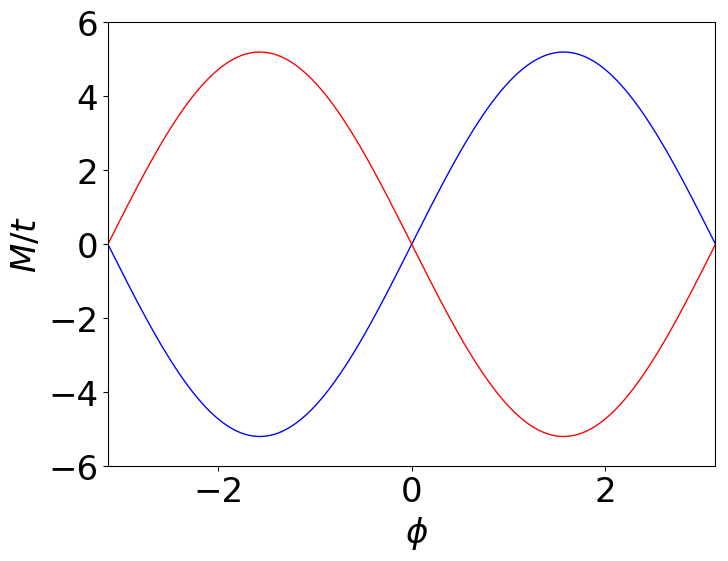

In [2]:
pd(2002)